In [14]:
!pip install pandas
!pip install h5py
!pip install torch
!pip install snntorch
!pip install torchvision
!pip install tqdm
!pip install matplotlib

  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp310-cp310-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp310-cp310-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)


In [50]:
from snntorch.spikevision import spikedata
import snntorch as snn

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

from matplotlib.animation import PillowWriter

In [51]:
# Loading the DVS dataset
num_steps_train = 500
num_steps_test = 1800

# time step is integrated over 1000 microseconds
# duration of each timestep which is 1ms
dt = 1000

In [52]:
train_ds = spikedata.DVSGesture("DVSGesturedataset", train = True, num_steps = 500, dt = dt)
test_ds = spikedata.DVSGesture("DVSGesturedataset", train = False, num_steps = 1800, dt = dt)
# dont understand why they need different num_steps

In [53]:
train_ds

Dataset DVSGesture
    Number of datapoints: 1176
    Root location: DVSGesturedataset/dvs_gesture.hdf5
    StandardTransform
Transform: Compose(
               Downsample(dt = {0}, dp = {1}, dx = {2}, dy = {3})
               ToCountFrame(T=500)
               ToTensor(device:cpu)
               dvs_permute()
           )
Target transform: <function identity at 0x00000173EC651EA0>

In [54]:
test_ds

Dataset DVSGesture
    Number of datapoints: 288
    Root location: DVSGesturedataset/dvs_gesture.hdf5
    StandardTransform
Transform: Compose(
               Downsample(dt = {0}, dp = {1}, dx = {2}, dy = {3})
               ToCountFrame(T=1800)
               ToTensor(device:cpu)
               dvs_permute()
           )
Target transform: <function identity at 0x00000173EC651EA0>

In [55]:
train_ds.keys[0]

np.int64(0)

In [56]:
train_data = DataLoader(train_ds, shuffle = True, batch_size = 64)
test_data = DataLoader(test_ds, shuffle = False, batch_size = 64)

In [57]:
train_data.dataset

Dataset DVSGesture
    Number of datapoints: 1176
    Root location: DVSGesturedataset/dvs_gesture.hdf5
    StandardTransform
Transform: Compose(
               Downsample(dt = {0}, dp = {1}, dx = {2}, dy = {3})
               ToCountFrame(T=500)
               ToTensor(device:cpu)
               dvs_permute()
           )
Target transform: <function identity at 0x00000173EC651EA0>

In [58]:
# Visualize the data
n = 1

#indexing the single sample
a = (train_data.dataset[n][0][:,0] + train_data.dataset[n][0][:,1])


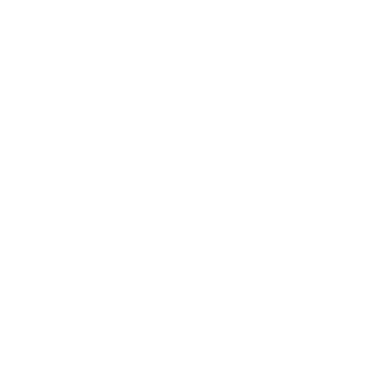

In [59]:
fig, ax = plt.subplots()
anim = splt.animator(a, fig, ax, interval = 10)


#HTML(anim.to_html5_video())

anim.save('dvsgesture_animator.gif', writer = 'ffmpeg',fps = 50)
print()

In [60]:
HTML(anim.to_html5_video())

------------------------------------------------------------------

________________________________________________________________

In [10]:
import h5py
f = h5py.File('DVSGesturedataset/dvs_gesture.hdf5', 'r')
f.keys()

<KeysViewHDF5 ['data', 'extra']>

In [11]:
f.keys()

<KeysViewHDF5 ['data', 'extra']>

In [13]:
f['data'].attrs.keys()

<KeysViewHDF5 []>

In [13]:
f['extra'].keys()

<KeysViewHDF5 ['test_keys', 'train_keys']>

In [14]:
f['extra'].attrs.keys()

<KeysViewHDF5 ['N', 'Ntest', 'Ntrain']>

In [15]:
key = 4+f['extra'].attrs['Ntrain']
key

np.int64(1180)